## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Dec 25 16:28:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              8W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [3]:
!pip install ultralytics==8.2.103 -q

# prevent ultralytics from tracking your activity
!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [21]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")
API_KEY = os.getenv("ROBOFLOW_API_KEY")

In [36]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("thesis-digkz").project("cue-detection-ciazj")
version = project.version(3)
dataset = version.download("yolov8")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [34]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

In [35]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wjJotREKQOehGwzn6SZf")
project = rf.workspace("thesis-z9dom").project("cue-detection")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [37]:
import shutil
import os

# UŻYWAMY PEŁNYCH ŚCIEŻEK (ABSOLUTNYCH)
# Dzięki temu unikamy błędu "No such file or directory"
base_path = "/content/datasets"

folder_glowny = os.path.join(base_path, "Cue-Detection-3")   # Docelowy
folder_dodatkowy = os.path.join(base_path, "cue-detection-1") # Źródłowy

subsets = ['train', 'valid', 'test']
dirs = ['images', 'labels']

print(f"Kopiowanie z: {folder_dodatkowy}")
print(f"Do: {folder_glowny}")

for subset in subsets:
    for d in dirs:
        src_dir = os.path.join(folder_dodatkowy, subset, d)
        dst_dir = os.path.join(folder_glowny, subset, d)

        # Sprawdzamy czy folder źródłowy istnieje
        if os.path.exists(src_dir):
            # Upewniamy się, że folder docelowy istnieje (jak nie, to go tworzymy)
            os.makedirs(dst_dir, exist_ok=True)

            files = os.listdir(src_dir)
            count = 0
            for file in files:
                src_file = os.path.join(src_dir, file)
                dst_file = os.path.join(dst_dir, file)

                # Kopiowanie
                shutil.copy(src_file, dst_file)
                count += 1

            print(f"Skopiowano {count} plików do {dst_dir}")
        else:
            print(f"Pominięto (brak folderu źródłowego): {src_dir}")

print("Zakończono łączenie datasetów.")

Kopiowanie z: /content/datasets/cue-detection-1
Do: /content/datasets/Cue-Detection-3
Skopiowano 426 plików do /content/datasets/Cue-Detection-3/train/images
Skopiowano 426 plików do /content/datasets/Cue-Detection-3/train/labels
Skopiowano 41 plików do /content/datasets/Cue-Detection-3/valid/images
Skopiowano 41 plików do /content/datasets/Cue-Detection-3/valid/labels
Skopiowano 20 plików do /content/datasets/Cue-Detection-3/test/images
Skopiowano 20 plików do /content/datasets/Cue-Detection-3/test/labels
Zakończono łączenie datasetów.


In [38]:
print(dataset.location)

/content/datasets/Cue-Detection-3


## Train a YOLOv8 Keypoint Detection Model

With our dataset downloaded, we can now train a YOLOv8 keypoint detection model. Run the code snippet below to start training your model:

In [40]:
%cd {HOME}
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=150, imgsz=640, patience=30, batch=16)

/content


100%|██████████| 6.52M/6.52M [00:00<00:00, 115MB/s]

New https://pypi.org/project/ultralytics/8.3.241 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=/content/datasets/Cue-Detection-3/data.yaml, epochs=150, time=None, patience=30, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1     37248  ultralytics.nn.modules.block.C2f             [192, 64, 1]                  
 16                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1    123648  ultralytics.nn.modules.block.C2f             [192, 128, 1]                 
 19                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

100%|██████████| 6.25M/6.25M [00:00<00:00, 143MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Cue-Detection-3/train/labels.cache... 780 images, 18 backgrounds, 0 corrupt: 100%|██████████| 780/780 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/Cue-Detection-3/valid/labels.cache... 75 images, 3 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/150      2.33G      1.856      2.673     0.6606      2.551       1.69         15        640: 100%|██████████| 49/49 [00:18<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all         75         74       0.43      0.568      0.411        0.2      0.409      0.568      0.475      0.259



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.31G      1.731      1.584     0.6182      1.792      1.515         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         75         74      0.515      0.514      0.489      0.267      0.643        0.5      0.587      0.411



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.31G       1.81      1.331      0.563      1.722      1.531         28        640: 100%|██████████| 49/49 [00:16<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         75         74      0.326      0.284      0.227     0.0911      0.289      0.541      0.318      0.181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.31G      1.804      1.175     0.5217      1.765       1.54         24        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         75         74      0.671      0.432       0.49      0.267      0.735      0.488      0.578      0.421



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/150      2.31G      1.719     0.9922     0.4969       1.59      1.446         25        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         75         74      0.494      0.527      0.563      0.296       0.54      0.581      0.622       0.48



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.31G      1.664     0.9294     0.4925      1.521       1.44         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]


                   all         75         74      0.688      0.566      0.663      0.334      0.687      0.622      0.689      0.584

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.31G      1.638     0.8097     0.4893      1.456      1.387         18        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         75         74      0.746      0.556       0.62      0.345      0.782      0.582      0.721      0.604



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.31G      1.525     0.7014     0.4753      1.376       1.35         16        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75         74      0.893      0.622      0.746      0.475      0.878      0.649      0.766      0.695



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.31G      1.575     0.8469     0.4781      1.447      1.376         26        640: 100%|██████████| 49/49 [00:15<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         75         74      0.862      0.622      0.776      0.468      0.881      0.676       0.85      0.729



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/150      2.31G       1.46     0.7362     0.4543      1.287      1.305         22        640: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75         74      0.793      0.689      0.784      0.485      0.785      0.739      0.842      0.766



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.31G      1.425     0.6369     0.4659      1.257      1.283         20        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         74      0.877      0.769      0.874      0.559      0.902      0.797      0.908      0.831



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.31G      1.432     0.6736     0.4326      1.241      1.296         28        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75         74      0.844      0.676       0.81      0.492      0.886      0.716      0.888      0.821



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.31G       1.36      0.699     0.4313      1.211      1.259         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         75         74      0.743      0.797      0.783      0.487      0.791      0.851      0.872      0.798



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.31G      1.354     0.5955      0.425      1.153       1.27         22        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all         75         74      0.743      0.781      0.793      0.482      0.814      0.851      0.877      0.806



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.31G       1.31     0.5959     0.3976      1.137      1.232         21        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         75         74      0.876      0.784      0.875      0.568      0.848       0.77      0.886      0.842



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.31G      1.294     0.6113     0.3989      1.112      1.229         26        640: 100%|██████████| 49/49 [00:15<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         75         74      0.833      0.824      0.875       0.56      0.834      0.865        0.9      0.855



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.31G      1.279      0.525     0.3862      1.074      1.208         19        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         74      0.785      0.791      0.841      0.503      0.812      0.824      0.889      0.817



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.31G      1.317      0.522     0.3773      1.129      1.231         14        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all         75         74      0.832      0.838      0.873      0.571      0.871      0.878      0.936      0.883



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.31G      1.298     0.4884      0.395      1.098      1.221         20        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         75         74      0.789      0.797      0.854      0.542      0.851      0.773      0.872      0.826



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.31G      1.269     0.5083     0.3681      1.108      1.216         25        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         75         74      0.893      0.793      0.899      0.626      0.907      0.797      0.919      0.866



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.31G      1.201     0.4389     0.3291      1.035      1.172         19        640: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         75         74      0.923      0.815      0.911      0.616       0.91      0.821      0.919      0.871



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.31G      1.188     0.4292     0.3321     0.9938       1.17         22        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         75         74       0.86      0.832      0.908      0.629      0.869      0.893      0.944        0.9



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.31G        1.2     0.4274     0.3195       1.01      1.183         20        640: 100%|██████████| 49/49 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         75         74       0.81       0.77      0.846      0.571      0.874       0.77        0.9      0.836



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/150      2.31G      1.198     0.5025     0.3189      1.046      1.188         22        640: 100%|██████████| 49/49 [00:14<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         75         74      0.923      0.812      0.929      0.619      0.882      0.838      0.921      0.883



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.31G      1.119     0.4125      0.275     0.9498      1.128         22        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         75         74      0.964      0.838      0.919      0.615      0.964      0.838      0.939      0.904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.31G      1.141     0.3813     0.2639     0.9349      1.146         20        640: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         75         74      0.862      0.844      0.891      0.597      0.843      0.872      0.912      0.873



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.31G      1.174     0.3964     0.2752     0.9578      1.171         19        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75         74      0.923       0.81      0.908      0.625      0.923       0.81      0.927      0.878



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.31G      1.125      0.432     0.2801     0.9542      1.147         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         75         74       0.84       0.85      0.892      0.606       0.84       0.85      0.929      0.867



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.31G      1.119      0.439     0.2383     0.9419      1.143         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         75         74      0.932      0.757      0.861      0.631      0.873      0.797      0.891      0.833



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.31G      1.086     0.3681     0.2204     0.9042      1.116         18        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         75         74      0.875      0.848      0.902      0.615      0.889      0.862      0.915      0.877



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.31G      1.074     0.3976       0.23     0.9027      1.111         25        640: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         75         74      0.925      0.829      0.928      0.642      0.924      0.827      0.926      0.898



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.31G      1.082     0.3299     0.1987     0.9024      1.114         20        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         75         74      0.865      0.851      0.908      0.618      0.887      0.865      0.913      0.884



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.31G       1.06     0.3736     0.2168     0.8915      1.108         26        640: 100%|██████████| 49/49 [00:15<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         75         74       0.94      0.865      0.947      0.634      0.899      0.838      0.923      0.886



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.31G       1.07     0.3916     0.2017     0.8746      1.117         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         75         74      0.876       0.86      0.902      0.617      0.878      0.876      0.911      0.867



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.31G      1.087     0.4291     0.2045     0.9084      1.125         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         75         74      0.917      0.865      0.923      0.643      0.943      0.901      0.953      0.909



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.31G      1.038     0.3291     0.1889     0.8404      1.103         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         75         74      0.862      0.878      0.899      0.616      0.843      0.871      0.901       0.86



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.31G      1.048     0.3576     0.1889     0.8407      1.097         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all         75         74      0.983      0.797      0.914      0.624      0.983      0.797      0.936      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.31G      1.029     0.3529     0.1896     0.8728      1.113         19        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         75         74       0.94      0.842      0.928      0.623       0.94      0.842       0.94      0.895



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.31G      1.057     0.3695     0.1945     0.8727       1.11         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]

                   all         75         74      0.929      0.905      0.937      0.629      0.929      0.905      0.939        0.9



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.31G      1.011     0.3276     0.1783      0.843      1.093         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         75         74      0.888      0.861      0.922      0.639      0.946      0.824      0.919      0.874



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.31G     0.9978     0.3598     0.1802     0.8475      1.091         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         75         74      0.942      0.881      0.965      0.691      0.942      0.851       0.96      0.921



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.31G     0.9992     0.3061     0.1889     0.8253      1.092         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         75         74      0.834      0.878      0.906      0.681      0.901      0.858      0.934      0.895



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.31G     0.9664     0.3009     0.1621     0.8044      1.061         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         75         74      0.889      0.824      0.914      0.663      0.919      0.851      0.937      0.904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.31G     0.9727     0.2951     0.1702     0.8008      1.088         19        640: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         75         74      0.902      0.865       0.94      0.678      0.888      0.851      0.924      0.904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.31G     0.9558     0.2757      0.153     0.8009       1.07         25        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         75         74      0.915      0.871      0.925      0.675       0.94      0.919       0.96      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.31G     0.9509     0.2897     0.1615      0.759      1.051         14        640: 100%|██████████| 49/49 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         75         74      0.883      0.851      0.887      0.659      0.928      0.873      0.926      0.896



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.31G     0.9662     0.3386     0.1835     0.8055      1.076         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         75         74      0.904      0.851      0.924      0.664      0.933      0.878      0.955      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/150      2.31G     0.9748     0.3605     0.1703     0.7621      1.057         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         75         74      0.956      0.871      0.954      0.675      0.941      0.858      0.931      0.896



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.33G     0.9593     0.2517     0.1437     0.8054      1.063         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         75         74      0.968      0.878      0.943      0.694      0.954      0.849      0.941      0.914



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.31G     0.9477     0.3149       0.15     0.8062      1.076         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all         75         74      0.928      0.865      0.942        0.7      0.922      0.892      0.956      0.924



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.31G     0.9266     0.2666     0.1296     0.7766      1.057         16        640: 100%|██████████| 49/49 [00:14<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         75         74      0.911       0.77      0.901       0.65      0.903      0.876      0.926      0.886



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.31G     0.9161     0.2923     0.1581     0.7783      1.054         19        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all         75         74      0.885      0.892      0.926      0.665      0.926      0.892      0.951      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.31G     0.9374     0.2655     0.1351     0.7583       1.05         19        640: 100%|██████████| 49/49 [00:15<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         75         74      0.835      0.878      0.915       0.65      0.817      0.903      0.929      0.891



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.33G     0.9073     0.3154     0.1526     0.7294      1.053         22        640: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         75         74      0.933      0.878       0.95       0.67      0.936      0.865      0.942      0.906



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/150      2.31G     0.9246     0.2564     0.1388     0.7446      1.057         25        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         75         74      0.915      0.868      0.934      0.674      0.929      0.879      0.949      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/150      2.31G      0.867     0.2512     0.1201     0.7234      1.023         18        640: 100%|██████████| 49/49 [00:15<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         75         74      0.933      0.878      0.925      0.683      0.975      0.905      0.964      0.932



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.31G      0.884     0.2959     0.1394     0.7367      1.036         19        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         75         74      0.973      0.851      0.952      0.692      0.989      0.865      0.969      0.937



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.31G     0.8857     0.2622     0.1314     0.7219      1.042         21        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         75         74      0.861      0.922      0.958      0.679      0.963      0.838      0.955      0.933



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.31G     0.8971     0.3133     0.1402     0.7476      1.047         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]


                   all         75         74      0.894      0.892       0.93      0.675      0.908      0.905      0.944      0.908

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.31G     0.8715     0.2681     0.1352     0.7371      1.045         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all         75         74      0.923      0.878      0.932      0.693      0.903      0.932      0.961      0.913



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.31G     0.8878     0.3219     0.1306     0.7278       1.04         23        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         75         74      0.907       0.92      0.956      0.693      0.973      0.851      0.958      0.886



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.31G     0.8534     0.2538     0.1428     0.7116      1.023         26        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         75         74      0.904      0.905      0.928      0.684      0.937      0.932      0.952      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.31G     0.8657     0.2465     0.1191     0.7294      1.026         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75         74      0.912      0.919      0.962      0.698      0.899      0.905       0.95      0.918



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.31G     0.8626     0.2258     0.1301     0.7372      1.032         11        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         75         74      0.913      0.905      0.927      0.696      0.941      0.932      0.959      0.932



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.31G     0.8275     0.2458     0.1317     0.6856      1.019         18        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         74      0.943       0.89      0.947       0.69      0.951      0.892      0.952      0.885



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.31G     0.8572     0.2553     0.1178     0.7045      1.036         23        640: 100%|██████████| 49/49 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         75         74      0.892      0.919       0.94      0.666      0.892      0.919      0.946      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.31G     0.8108     0.2239     0.1096        0.7     0.9982         19        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         75         74      0.928      0.851      0.917      0.688      0.946      0.824      0.929      0.869



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.31G     0.8328     0.2157     0.1348     0.6979      1.019         23        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         75         74      0.882      0.892      0.932      0.646      0.872      0.919      0.947        0.9



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.31G     0.8091     0.2419     0.1245     0.6832      1.006         24        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         75         74      0.876      0.878       0.92      0.675      0.885      0.892      0.929      0.857



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.31G     0.8296     0.2608     0.1048     0.6909      1.013         20        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75         74      0.937      0.905       0.97      0.717      0.951      0.919      0.977      0.932



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.31G       0.83     0.2407     0.1228     0.7135      1.016         18        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         74      0.958      0.926      0.968      0.676      0.958      0.926      0.975      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.31G     0.8433     0.2482     0.1231     0.7093      1.028         26        640: 100%|██████████| 49/49 [00:14<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all         75         74      0.937      0.905      0.962      0.715      0.924      0.892      0.926      0.858



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.31G     0.8098     0.2497     0.1237     0.6747      1.011         20        640: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         75         74      0.923      0.919      0.965      0.711      0.932      0.878      0.951      0.897



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.31G     0.8133     0.2402     0.1126     0.6978      1.012         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         75         74      0.916      0.882      0.962      0.696      0.916      0.882      0.952      0.894



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.31G     0.8158     0.2242     0.1014     0.6718      1.025         22        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all         75         74      0.946      0.905      0.953      0.681      0.961      0.905      0.964      0.901



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.31G     0.8179     0.2302     0.1152     0.6698      1.019         11        640: 100%|██████████| 49/49 [00:16<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all         75         74      0.894      0.959      0.974      0.713      0.929      0.932      0.962      0.927



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.33G     0.8071     0.2294     0.1173      0.687      1.008         19        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         75         74      0.904      0.932      0.971      0.698       0.97      0.892      0.972      0.949



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.31G     0.7874     0.1517     0.1117     0.6424     0.9934         25        640: 100%|██████████| 49/49 [00:15<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         75         74      0.905      0.865       0.93      0.688      0.944      0.865      0.955      0.934



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.31G     0.7792     0.1756    0.08221     0.6312     0.9965         23        640: 100%|██████████| 49/49 [00:15<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


                   all         75         74      0.945      0.931      0.974       0.73      0.918      0.904      0.935      0.908

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.31G     0.7616     0.1888     0.1088     0.6467     0.9858         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         75         74      0.905      0.898      0.936      0.676      0.895      0.878      0.907      0.844



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.31G     0.7653     0.1906     0.1113     0.6238     0.9869         11        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         75         74      0.904      0.905      0.944      0.683      0.905      0.919      0.937       0.91



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.31G     0.7645     0.2369     0.1126      0.636      1.002         13        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all         75         74      0.958      0.914       0.95      0.717      0.933      0.878      0.923      0.868



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.31G     0.7455      0.229     0.1131     0.6353     0.9926         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all         75         74      0.961      0.932      0.949      0.714      0.935      0.905      0.954      0.912



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.31G       0.77     0.2026     0.1008     0.6461      1.001         23        640: 100%|██████████| 49/49 [00:15<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         75         74      0.901      0.905      0.938      0.697      0.971       0.89       0.95      0.898



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.31G     0.7525     0.1726     0.1068     0.6299     0.9839         20        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         75         74      0.961      0.932       0.97      0.717      0.947      0.919      0.958      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.31G     0.7624     0.1824      0.117     0.6391     0.9972         17        640: 100%|██████████| 49/49 [00:16<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         75         74      0.953      0.892      0.946      0.709      0.953      0.892      0.932      0.863



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.31G       0.72     0.1227    0.09625      0.609     0.9727         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all         75         74      0.904      0.946      0.962      0.711      0.891      0.932      0.952      0.932



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.31G     0.7635     0.1661     0.1062     0.6235     0.9913         22        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75         74      0.943      0.932       0.97      0.718      0.915      0.878      0.909      0.861



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.31G     0.7728     0.1485    0.09014     0.6475     0.9925         24        640: 100%|██████████| 49/49 [00:15<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]

                   all         75         74      0.908      0.928      0.957      0.727      0.966      0.892      0.958      0.935



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/150      2.31G     0.7522     0.1602    0.08803     0.6378     0.9898         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         75         74       0.97      0.886       0.95      0.703      0.949      0.865      0.924      0.881



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.31G       0.73     0.1764    0.09367     0.6321     0.9789         24        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         75         74      0.944      0.905       0.95      0.715      0.949      0.865      0.937      0.901



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/150      2.31G     0.7224     0.1644    0.09305     0.6194     0.9857         24        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]

                   all         75         74       0.93      0.905      0.946      0.697       0.97      0.873      0.965      0.936



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.31G     0.7626      0.175     0.1023     0.6305     0.9938         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         75         74      0.933      0.919      0.945      0.702      0.958      0.928      0.967      0.883



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/150      2.31G     0.7032     0.1367    0.09908     0.5949      0.974         28        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         75         74      0.895      0.932      0.953      0.734      0.936      0.892      0.947      0.917



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.31G     0.7274     0.1357    0.08522     0.6073     0.9905         18        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         74      0.959      0.945      0.976      0.734      0.945      0.932       0.98      0.926



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.31G     0.7155     0.1273    0.09699     0.5806      0.975         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]


                   all         75         74       0.93      0.891      0.959      0.703      0.971      0.878       0.97       0.92

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.31G     0.7036     0.1193     0.0863     0.5904     0.9659         23        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75         74      0.956      0.884      0.945      0.712      0.933      0.942       0.97      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.31G     0.7233     0.1482    0.08471     0.6102     0.9878         14        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         75         74      0.913      0.854      0.917      0.694      0.956      0.888      0.938      0.891



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.31G     0.7164     0.1563    0.09803     0.6136     0.9845         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.85it/s]

                   all         75         74      0.966      0.905      0.964      0.695      0.943      0.888      0.938      0.899



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.31G     0.6802     0.1257    0.07191     0.5927     0.9634         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all         75         74      0.985       0.89      0.962      0.721      0.985      0.891      0.957      0.928



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/150      2.31G     0.6779     0.1206    0.08437     0.5822     0.9635         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         75         74       0.87      0.959      0.952      0.732      0.942      0.883       0.95      0.893



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.31G     0.6904     0.1301    0.07804     0.5933     0.9834         20        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         75         74      0.906      0.915      0.938      0.724      0.933      0.941      0.977      0.938



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.31G     0.6952     0.1318    0.09743     0.5943     0.9823         19        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all         75         74      0.942      0.905      0.947      0.723       0.94      0.905      0.958       0.93



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.31G     0.6946     0.1269    0.08809     0.5926     0.9691         13        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all         75         74      0.919      0.946      0.975      0.727      0.971      0.902      0.968      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.31G     0.6662      0.161    0.08481     0.5799     0.9565         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         74      0.984      0.905      0.965      0.713      0.894      0.909      0.946      0.918



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.31G     0.6772     0.1406    0.09208     0.5555     0.9719         18        640: 100%|██████████| 49/49 [00:15<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all         75         74      0.939      0.892       0.96      0.729      0.918      0.919      0.958      0.937



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.31G     0.6627     0.1232    0.07703     0.5457     0.9494         10        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all         75         74      0.951      0.892      0.966      0.735      0.939      0.919       0.96      0.933



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.31G      0.671     0.1367    0.08641     0.5569     0.9619         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         75         74       0.97      0.885      0.957      0.711       0.98      0.892      0.963      0.934



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.31G     0.6731     0.1054    0.09166     0.5615     0.9572         27        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         75         74      0.937      0.878      0.956      0.706      0.972      0.931      0.978      0.945



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.33G     0.6529     0.1069    0.07714      0.551     0.9532         21        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all         75         74      0.921      0.919      0.967      0.717      0.929      0.883      0.936      0.916



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.31G     0.6597     0.1209    0.07472     0.5579     0.9695         23        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]


                   all         75         74      0.911      0.919      0.955      0.718      0.922      0.865      0.897       0.87

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.31G     0.6502      0.112    0.07922     0.5571     0.9572         27        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         75         74      0.944      0.913      0.967       0.73       0.95      0.919      0.949      0.931



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/150      2.31G     0.6456     0.1095    0.07684     0.5516     0.9572         26        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         75         74      0.911      0.892      0.962      0.756      0.917      0.898      0.959      0.937



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/150      2.31G     0.6442     0.1124    0.09034     0.5412     0.9501         16        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         75         74      0.869      0.919      0.935      0.735      0.965      0.905      0.963       0.94



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.31G     0.6476      0.103    0.09144      0.546     0.9544         17        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         75         74      0.929      0.892      0.957      0.734      0.954      0.919      0.953       0.93



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.31G     0.6334    0.08916    0.07712     0.5374     0.9477         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.78it/s]

                   all         75         74      0.942      0.892      0.954      0.751      0.942      0.892      0.959      0.936



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.31G     0.6105    0.09479    0.06946     0.5368     0.9452         20        640: 100%|██████████| 49/49 [00:14<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all         75         74      0.929      0.889      0.956      0.751      0.982      0.892      0.961      0.945



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.31G     0.6309     0.1188    0.09075      0.547     0.9466         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         75         74      0.985      0.918      0.976      0.758      0.958      0.919      0.966      0.904



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.31G     0.6258     0.1024    0.08365     0.5369     0.9448         31        640: 100%|██████████| 49/49 [00:14<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]

                   all         75         74      0.944      0.905      0.948       0.73      0.896       0.93      0.953      0.913



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.31G     0.6326    0.09515    0.06878     0.5395     0.9427         19        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75         74      0.962      0.878      0.962      0.748      0.956      0.872      0.951      0.931



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.31G     0.6311    0.08693    0.07299      0.547     0.9582         15        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         75         74      0.916      0.887      0.956      0.754      0.931      0.865      0.946      0.922



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.31G     0.5913    0.09327    0.07604     0.5149     0.9337         24        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all         75         74      0.925      0.932      0.962      0.751      0.918      0.905      0.953      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.31G     0.5953     0.1054    0.09256     0.5244      0.954         24        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         75         74      0.971      0.918      0.974      0.743      0.932      0.932      0.953      0.932



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.31G     0.6023    0.08938    0.07172     0.5122     0.9426         20        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         75         74      0.961      0.892      0.968      0.746      0.953      0.892      0.947      0.915



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.31G     0.5867     0.1175    0.07809      0.518     0.9345         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         75         74      0.931      0.917      0.963      0.754      0.909       0.94      0.941      0.899



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.31G     0.5908    0.09198    0.07059      0.495     0.9351         24        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         75         74      0.928      0.905      0.956      0.744      0.931      0.918      0.957      0.933



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.31G     0.5901    0.08509    0.07363     0.5047     0.9386         15        640: 100%|██████████| 49/49 [00:15<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75         74      0.939      0.905      0.956       0.75      0.908       0.93      0.952      0.938



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/150      2.31G     0.5983     0.1027    0.07258     0.5296     0.9374         23        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         75         74      0.931      0.919      0.968      0.752      0.957      0.909      0.958      0.945



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.31G     0.5831    0.08806    0.05912     0.5046     0.9353         18        640: 100%|██████████| 49/49 [00:14<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         75         74      0.931      0.916      0.959      0.758      0.942      0.919      0.959      0.946



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.31G      0.588    0.09504    0.07437     0.5202     0.9429         10        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all         75         74      0.925      0.919      0.957      0.746      0.931      0.932      0.959      0.926



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.31G     0.5642    0.08646    0.06496     0.4913     0.9265         25        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         74      0.896      0.946      0.962      0.755      0.928      0.919      0.951      0.924



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.31G     0.5679    0.08002    0.06876     0.4887     0.9187         22        640: 100%|██████████| 49/49 [00:15<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all         75         74      0.919      0.919      0.951      0.745       0.93      0.919      0.958       0.92



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.31G     0.5737    0.09559     0.0719     0.5145     0.9371         17        640: 100%|██████████| 49/49 [00:15<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         75         74      0.928      0.905      0.958      0.753      0.956      0.905      0.956      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.31G      0.558    0.07899     0.0671     0.4838     0.9283         21        640: 100%|██████████| 49/49 [00:15<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         75         74      0.925      0.892      0.963      0.761      0.939      0.919      0.963      0.934



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.31G     0.5602     0.1099    0.07877     0.4895     0.9176         15        640: 100%|██████████| 49/49 [00:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         75         74      0.912      0.905      0.959      0.759      0.939      0.932       0.97      0.935



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.33G     0.5699    0.07952    0.06569     0.5028     0.9357         25        640: 100%|██████████| 49/49 [00:15<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         75         74       0.93      0.897      0.962      0.751      0.934      0.905      0.961      0.936



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.31G     0.5413     0.1054    0.06405      0.475     0.9185         18        640: 100%|██████████| 49/49 [00:14<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         75         74      0.925      0.905      0.954      0.759      0.932      0.921       0.97      0.946



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.31G     0.5352    0.07649    0.06309     0.4714     0.9186         16        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         75         74      0.919      0.915      0.957      0.758      0.944      0.917       0.97      0.943



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.31G     0.5537    0.09138    0.06093     0.4752     0.9303         13        640: 100%|██████████| 49/49 [00:15<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all         75         74       0.93      0.891      0.958      0.753      0.958      0.929      0.963      0.942



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/150      2.31G     0.5625    0.08801    0.05814     0.4724     0.9296         25        640: 100%|██████████| 49/49 [00:15<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all         75         74      0.881      0.946       0.96      0.756      0.933      0.942      0.963      0.946


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.31G     0.5145    0.06587    0.06004      0.398     0.9113         12        640: 100%|██████████| 49/49 [00:16<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         75         74      0.961      0.919      0.972      0.746       0.94      0.919      0.952      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.31G     0.4966    0.05551    0.07612      0.379     0.9029         11        640: 100%|██████████| 49/49 [00:14<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all         75         74      0.979      0.905      0.965      0.741      0.932       0.93      0.951      0.923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.31G     0.4787    0.04999    0.05501     0.3681     0.8888         10        640: 100%|██████████| 49/49 [00:14<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75         74      0.971       0.91      0.967      0.758      0.944      0.916      0.957      0.921



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.31G     0.4756    0.06321    0.05076     0.3724     0.9028         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         75         74      0.969      0.892      0.955      0.753      0.934      0.919      0.953      0.929



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/150      2.31G     0.4603    0.04696    0.04369     0.3609     0.8914         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         75         74      0.964      0.892      0.966      0.761      0.943      0.919      0.947      0.927



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.31G     0.4708    0.04885    0.06367      0.366     0.8869         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         75         74      0.968      0.919      0.967      0.756      0.931      0.916      0.946      0.925



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.31G     0.4729     0.0524    0.06177     0.3727     0.8973         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]

                   all         75         74      0.957      0.898      0.965      0.762       0.94      0.919      0.948      0.929



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.31G     0.4354     0.0516    0.04686     0.3546     0.8799         10        640: 100%|██████████| 49/49 [00:14<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         75         74      0.955      0.905      0.966      0.759      0.932      0.919      0.947       0.93



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.31G     0.4509    0.05956    0.06337     0.3558     0.8873         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         75         74      0.943      0.919      0.968      0.769      0.931      0.918      0.947      0.933



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.31G      0.466    0.04722    0.05379     0.3689     0.8925         12        640: 100%|██████████| 49/49 [00:14<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         75         74      0.943      0.919      0.968      0.764      0.931      0.919      0.948      0.932



150 epochs completed in 0.723 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.4MB

Validating runs/pose/train/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 187 layers, 3,077,669 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.54it/s]


                   all         75         74      0.927      0.905      0.954      0.759      0.932       0.92       0.97      0.946
Speed: 0.3ms preprocess, 2.8ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/pose/train


Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the Keypoint Detection Model

Let's test our keypoint detection model using [supervision](https://github.com/roboflow/supervision).

In [54]:
%cd {HOME}
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])

/content

image 1/1 /content/datasets/Cue-Detection-3/test/images/Screenshot_20251217-110645_Fotos_png.rf.00af96484e318ec6a9f1c5d8c644546f.jpg: 640x640 2 cues, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'cue'}
obb: None
orig_img: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]

We can visualize our keypoints using the following code:

In [42]:
# Bug in Google Colab
import locale

locale.getpreferredencoding = lambda: "UTF-8"

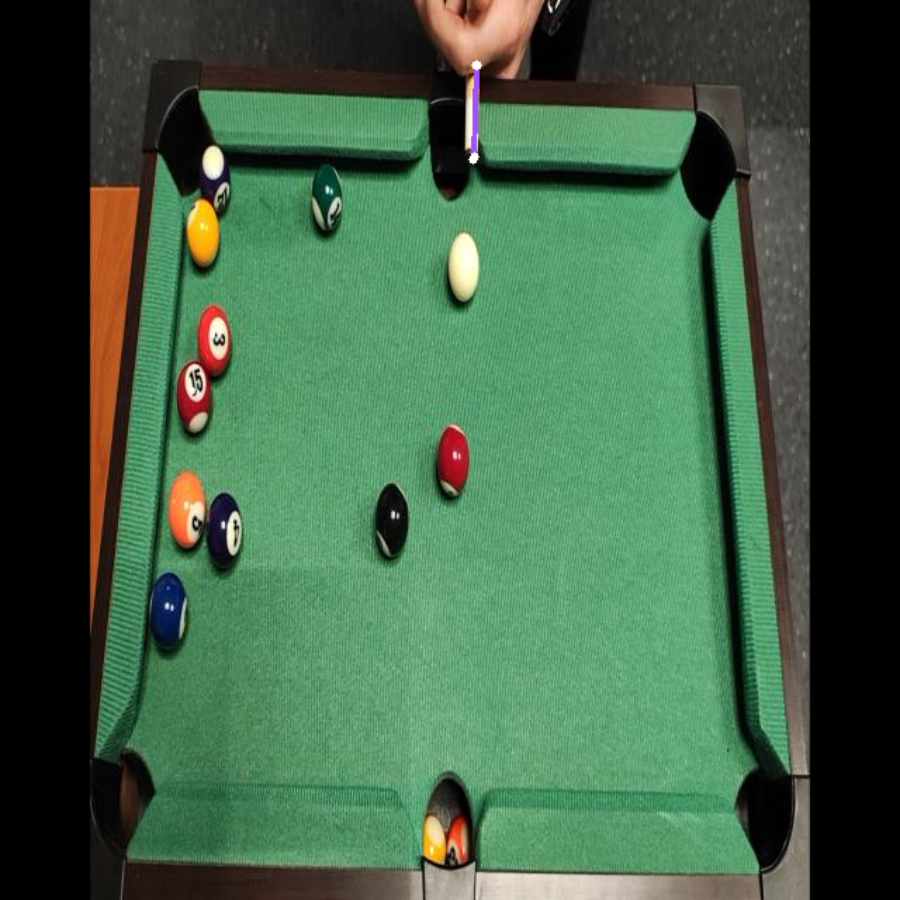

In [55]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

key_points = sv.KeyPoints.from_ultralytics(results[0])


vertex_annotator = sv.VertexAnnotator(radius=3, color=sv.Color.WHITE)
edge_annotator = sv.EdgeAnnotator(thickness=2, edges=[(0, 1)])

annotated_frame = cv2.imread(file_name)
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)

Our model successfully identified keypoints in the image.

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/pose/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and storage for later use.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [56]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/pose/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.103, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/thesis-digkz/cue-detection-ciazj/3
Share your model with the world at: https://universe.roboflow.com/thesis-digkz/cue-detection-ciazj/model/3


Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistant, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image).json()
pred

running inference on IMG_4837_JPG.rf.6462a662cb217bacd93d1de1f4458e51.jpg


{'predictions': [{'inference_id': 'b7b62f0d-3a71-46d1-ae90-bab728fe7ab0',
   'time': 0.03955303400016419,
   'image': {'width': 640, 'height': 640},
   'predictions': [{'x': 113.5,
     'y': 184.5,
     'width': 155.0,
     'height': 277.0,
     'confidence': 0.7923569679260254,
     'class': 'glue',
     'class_id': 0,
     'detection_id': 'cd9edf4e-4173-4804-9262-badacd7dd426',
     'keypoints': [{'x': 156.0,
       'y': 107.0,
       'confidence': 0.9488583207130432,
       'class_id': 0,
       'class_name': '0'},
      {'x': 48.0,
       'y': 292.0,
       'confidence': 0.87955641746521,
       'class_id': 1,
       'class_name': '1'}]},
    {'x': 515.0,
     'y': 339.0,
     'width': 122.0,
     'height': 300.0,
     'confidence': 0.6757180690765381,
     'class': 'glue',
     'class_id': 0,
     'detection_id': '734718ca-0489-4af9-aa99-80e6aad21277',
     'keypoints': [{'x': 549.0,
       'y': 215.0,
       'confidence': 0.9749020338058472,
       'class_id': 0,
       'class_na